In this notebook, we aim to solve the following rational expectation model, which was originally provided by Brock and Mirman (1972).
$$
\begin{align}
&\max_{\left\{c_{t}\right\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^{t} \ln\left(c_{t}\right) \\
\text{s.t.} \quad & k_{t+1} + c_{t} \leq Ak_{t}^\alpha
\end{align}
$$
As is well known, this particular problem has an analytical solution:
$$
\begin{align}
k_{t+1} = \alpha \beta A k_{t}^{\alpha}
\end{align}
$$
At first, we want to check the optimal growth path with the above policy funtion.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
print("Version of tensorflow is {}".format(tf.__version__))

Version of tensorflow is 1.13.1


In [3]:
A = 1  # Technology level
alpha = 0.3
beta = 0.95

def k_plus_analytic(k, alpha, beta, A):
    # Return the optimal capital stock in the next period
    return alpha * beta * A * k**alpha

/Users/takafumi/.pyenv/versions/anaconda3-5.3.0/envs/tensor1/lib/python3.7/site-packages/matplotlib/mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


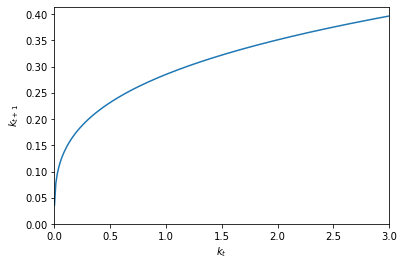

In [6]:
kbeg, kend, ksize = 1e-3, 3, 250
kgrid = np.linspace(kbeg, kend, ksize)

k_plus = k_plus_analytic(kgrid, alpha, beta, A)

plt.plot(kgrid, k_plus)
plt.xlim(0, kend)
plt.ylim(0, None)
plt.xlabel(r"$k_{t}$")
plt.ylabel(r"$k_{t+1}$")
plt.show()

Now, we aim to solve the Brock and Mirman (1972) by using deep learning.